In [1]:
SEED = 1221
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

# Preview train dataset
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


# cheking for missing values: 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2    I/O Data Bytes           8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent/sent           8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3818 non-null   object 
 1   I/O Data Operations       3818 non-null   float64
 2    I/O Data Bytes           3818 non-null   float64
 3   Number of subprocesses    3818 non-null   float64
 4   Time on processor         3818 non-null   float64
 5   Disk Reading/sec          3818 non-null   float64
 6   Disc Writing/sec          3818 non-null   float64
 7   Bytes Sent/sent           3818 non-null   float64
 8   Received Bytes (HTTP)     3818 non-null   float64
 9   Network packets sent      3818 non-null   float64
 10  Network packets received  3818 non-null   float64
 11  Pages Read/sec            3818 non-null   float64
 12  Pages Input/sec           3818 non-null   float64
 13  Page Errors/sec           3818 non-null   float64
 14  Confirme

# simple EDA

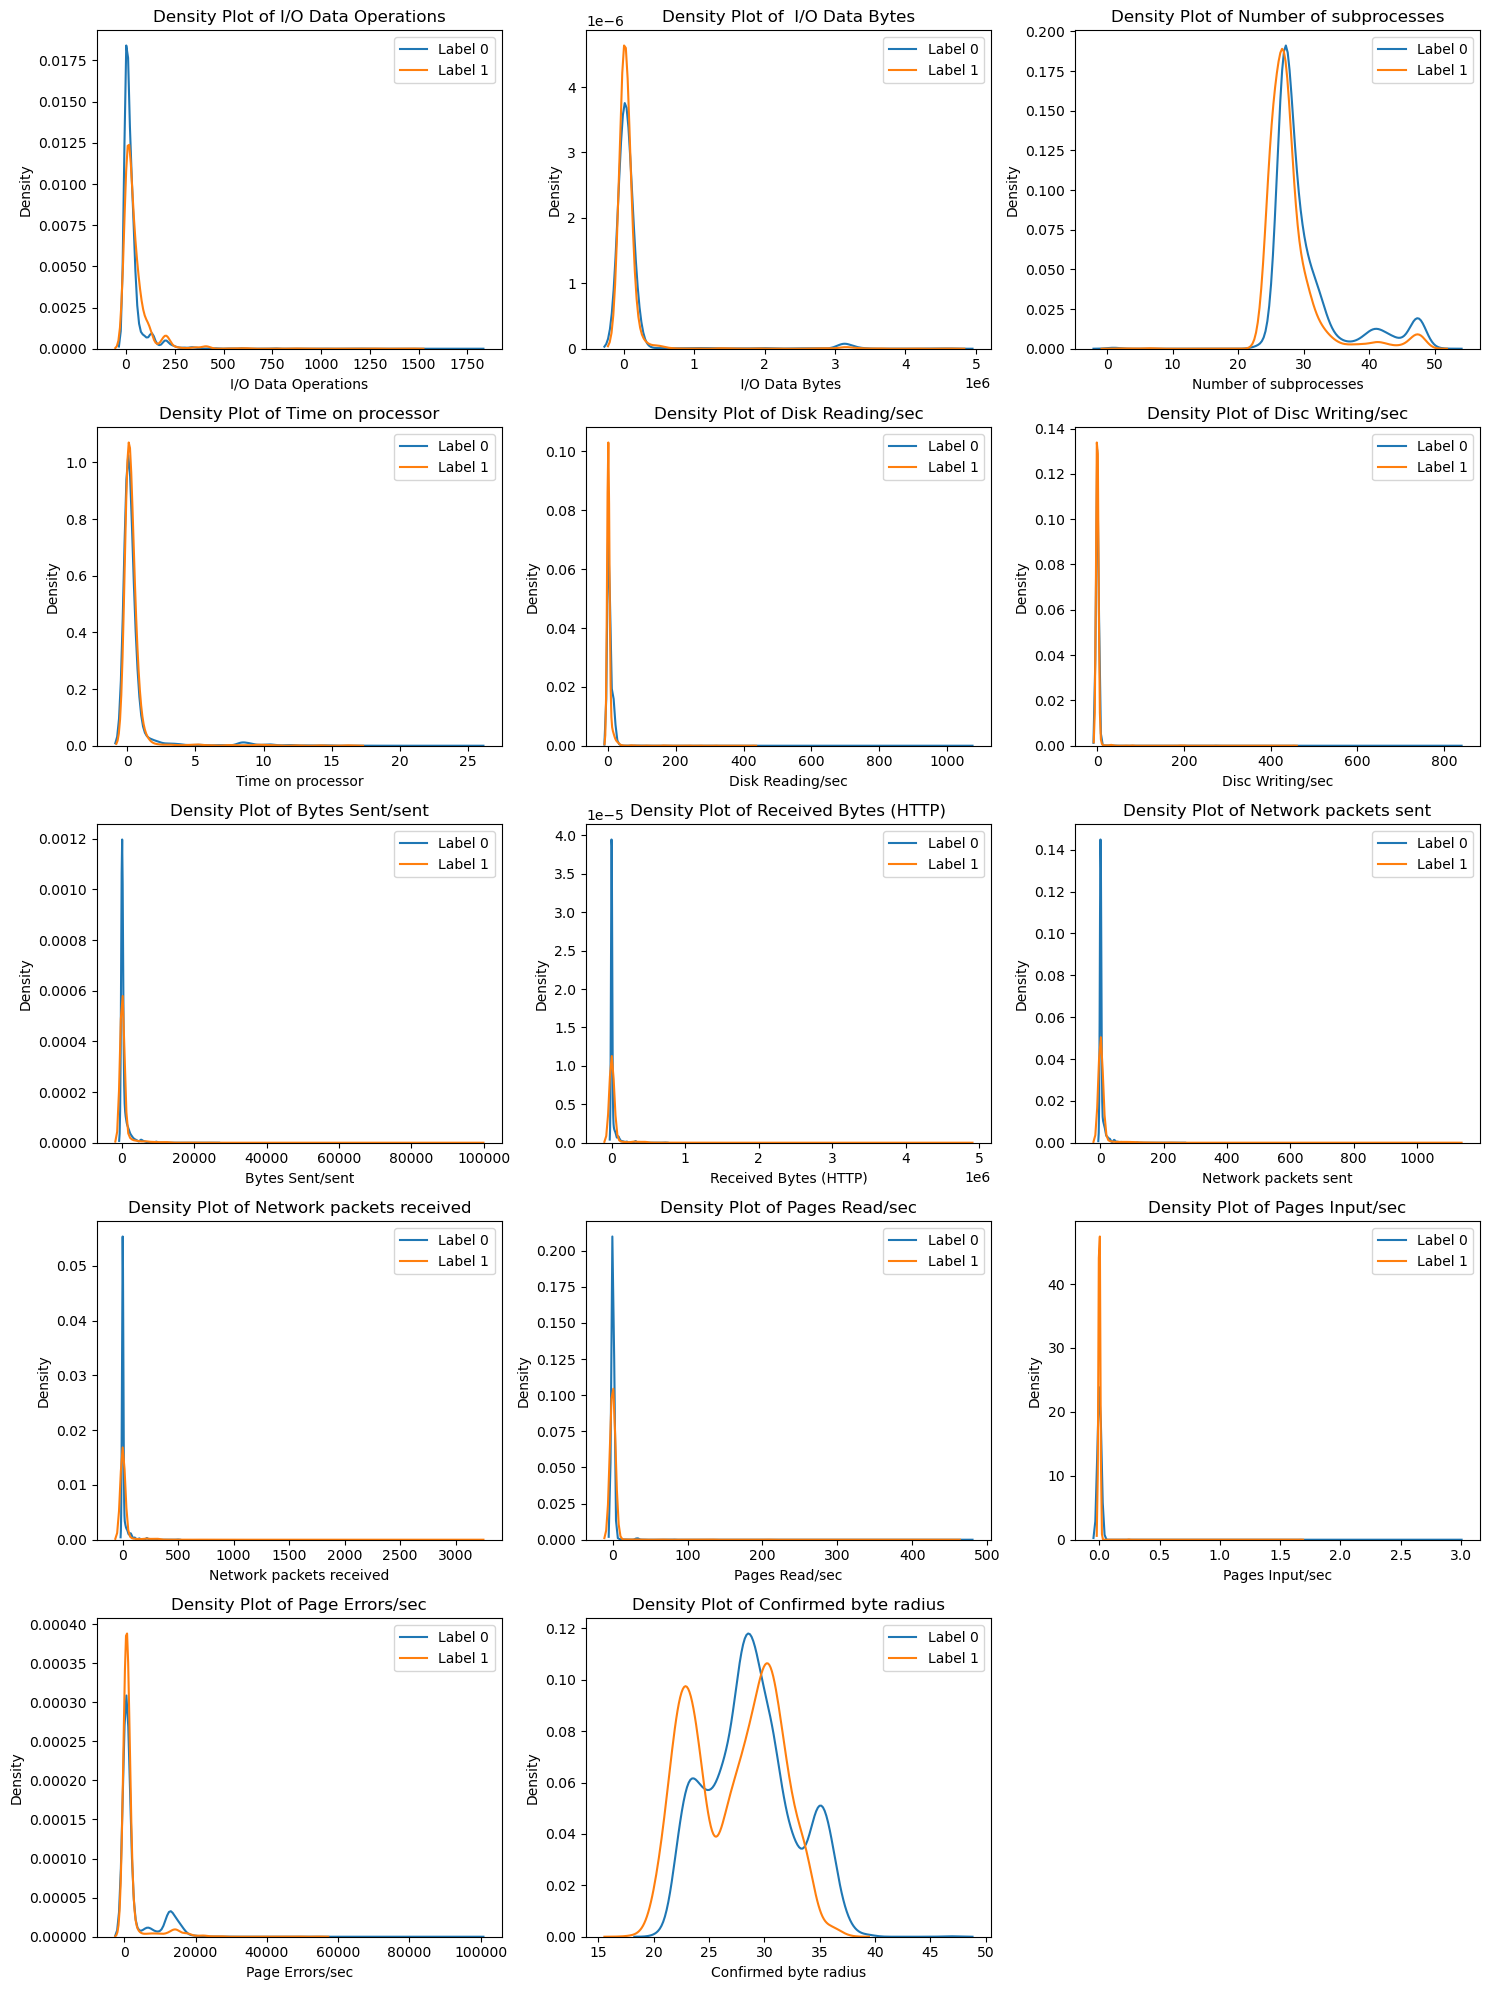

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
train.drop("ID",axis=1,inplace=True)
# Define the number of columns for the subplot grid
ncols = 3

# Define the number of rows for the subplot grid
nrows = int(np.ceil(len(train.columns) / ncols))

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 20))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over the columns
for i, column in enumerate(train.columns):
    if column == 'Label':
        continue

    # Plot the density of each variable with respect to the label (0 or 1)
    ax = axes[i]
    sns.kdeplot(train[train['Label'] == 0][column], label='Label 0', ax=ax)
    sns.kdeplot(train[train['Label'] == 1][column], label='Label 1', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.set_title('Density Plot of ' + column )
    ax.legend()

# Remove the empty subplots from the figure
for i in range(len(train.columns)-1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


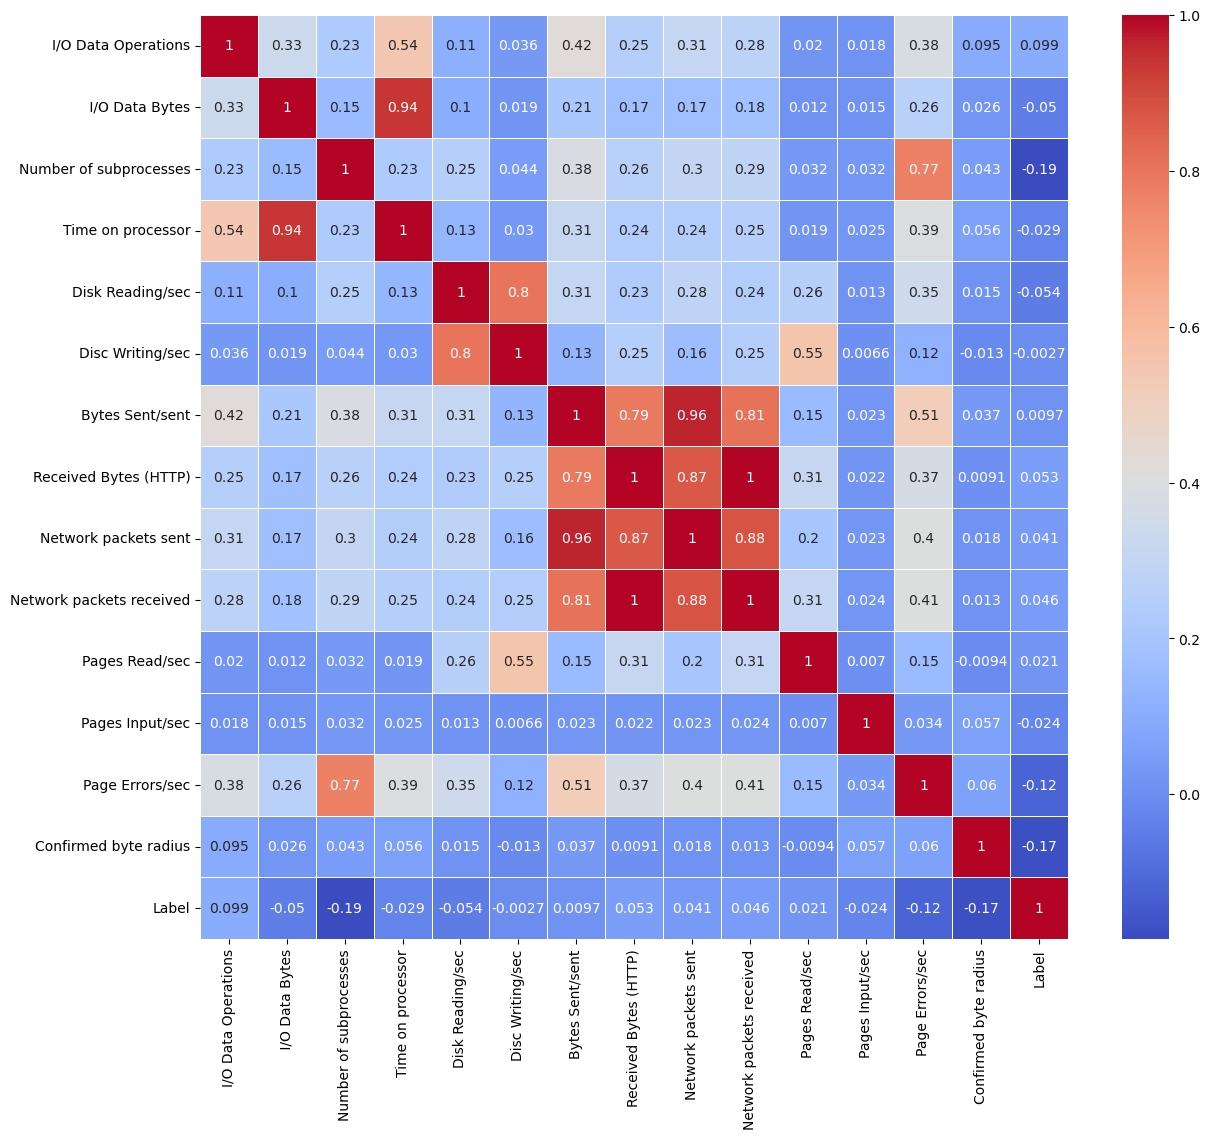

In [7]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

# Feature engineering: 

In [8]:
train["train"] = 1
test["train"] = 0
train_test = pd.concat([train,test])

In [9]:
train_test.drop("ID",axis=1,inplace=True)

In [10]:
new_names = {'I/O Data Operations':'data_operation', 'I/O Data Bytes':'data_bytes', 
             'Number of subprocesses':'n_subprocess', 'Time on processor':'t_on_processor', 
             'Disk Reading/sec':'disc_read', 'Disc Writing/sec':'disc_write', 
             'Bytes Sent':'byte_sent', 'Received Bytes (HTTP)':'byte_received', 
             'Network packets sent':'packet_sent', 'Network packets received':'packet_received', 
             'Pages Read/sec':'page_read', 'Pages Input/sec':'page_input', 
             'Page Errors/sec':'page_error', 'Confirmed byte radius':'byte_radius', 
             'Label':'Label'}
# data_operation : number of operation the process perform per unit of time
# data_bytes : amout of data being (read/written) per unit of time

In [11]:
var = pd.read_csv("Variable_Definitions.csv")
var["Feature"] = var["Feature"].apply(lambda x: new_names[x])
var

,Feature,Description
0,data_operation,Speed at which the process is issuing read and write I/O operations
1,data_bytes,Speed at which the process is reading and writing bytes in I/O operations
2,n_subprocess,Number of sub-processes that are currently active in a parent process
3,t_on_processor,"The total time, in seconds, that a process has been running"
4,disc_read,Speed of disk reading operations
5,disc_write,Speed of writing operations to disk
6,byte_radius,The ratio of Memory/Bytes committed and Memory/Confirmation limit
7,page_read,Speed rate at which the disk was read in order to resolve hard page errors
8,page_input,Speed at which pages are written to disk to free up space in physical memory
9,page_error,This is the average number of pages with faults per second


In [12]:
new_names = {'I/O Data Operations':'data_operation', ' I/O Data Bytes':'data_bytes', 
             'Number of subprocesses':'n_subprocess', 'Time on processor':'t_on_processor', 
             'Disk Reading/sec':'disc_read', 'Disc Writing/sec':'disc_write', 
             'Bytes Sent/sent':'byte_sent', 'Received Bytes (HTTP)':'byte_received', 
             'Network packets sent':'packet_sent', 'Network packets received':'packet_received', 
             'Pages Read/sec':'page_read', 'Pages Input/sec':'page_input', 
             'Page Errors/sec':'page_error', 'Confirmed byte radius':'byte_radius', 
             'Label':'Label'}
train_test = train_test.rename(columns=new_names)


In [13]:
train.describe()

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label,train
count,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.0
mean,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870,1.0
std,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917,0.0
min,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000,1.0
25%,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000,1.0
50%,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000,1.0
75%,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000,1.0
max,1795.316255,4.677280e+06,51.000000,25.246148,1064.819285,831.503948,98097.784300,4.812144e+06,1118.878021,3183.701036,475.031124,2.955622,98031.408630,46.784800,1.000000,1.0


In [14]:
# page error read ratio:
train_test["page_error_read"] = train_test['page_read'] / train_test["page_error"]

#Network packet bytes sent: Division of 'Bytes Sent' by 'Network packets sent'.
train_test["packet_bytes_sent"] = train_test["byte_sent"] / train_test['packet_sent']

# Network packet bytes received: Division of 'Received Bytes' by 'Network packets received'.
train_test["packet_bytes_received"] =  train_test["byte_received"] / train_test['packet_received']

# Network packets and bytes ratios (received/sent):
train_test["bytes_ratio"] =  train_test["byte_received"] / train_test["byte_sent"]
train_test["packets_ratio"] =  train_test["packet_received"] / train_test["packet_sent"]

train_test["packet_byte_ratio"] = train_test["bytes_ratio"] * train_test["packets_ratio"]
train_test["total_byte_packet_ratio"] =(train_test["byte_received"]+ train_test["byte_sent"])/(train_test["packet_received"]+train_test["packet_sent"])

#read write ratio:
train_test["disc_write_read"] = train_test["disc_write"] / train_test["disc_read"]

# Bytes per Disk Read
train_test["bytes_disc_read"] = train_test["data_bytes"] / train_test["disc_read"]

# processor time per subprocess:
train_test["process_time_subprocess"] = train_test["t_on_processor"] / train_test["n_subprocess"]


train_test["on_off"] = train_test["data_operation"].apply(lambda x: 0 if x==0 else 1) # either data_operation or data_bytes : same result

train_test["total_operations"] = train_test["data_operation"]* train_test["t_on_processor"]  # operation
train_test["total_bytes"] = train_test["data_bytes"] * train_test["t_on_processor"]   #bytes
train_test["bytes_per_operation"] = (train_test["data_bytes"]/ train_test["data_operation"]).fillna(0) # bytes/operation
train_test["bytes_per_operation_time"] = (train_test["bytes_per_operation"]/train_test["t_on_processor"]).fillna(0).replace(np.inf, 10e9)

train_test["operation_per_subprocess"] = train_test["data_operation"]/train_test["n_subprocess"] # op/process/time
train_test["bytes_per_subprocess"] = train_test["data_bytes"]/train_test["n_subprocess"] # op/process/time




In [15]:
train = train_test[train_test.train==1].drop("train",axis=1)
test =  train_test[train_test.train==0].drop(["train","Label"],axis=1)

In [16]:
X = train.drop(columns=["Label"])
y = train["Label"]

# Model 

In [17]:
from sklearn.metrics import f1_score
def f1_eval(predt, dtrain):
    y = dtrain.get_label()

    # convert the predicted values from {predt E R | 0<predt<1} to {0, 1} with a threshold of 0.5
    # all values less than 0.5 would be converted to 0 (False) and
    # all values equal or greater than 0.5 would be converted to 1 (True)
    predt_binary = np.where(predt > 0.5, 1, 0)
    return "F1_score", f1_score(y_true=y, y_pred=predt_binary)


In [18]:
import xgboost as xgb


# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Define XGBoost Classifier
clf = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.05,
    n_estimators=1500,
    objective="binary:logistic",
    booster="gbtree",
    n_jobs=-1,
    min_child_weight=0.7,
    disable_default_eval_metric= 1,
    scale_pos_weight=1.5*(sum(y_train==0)/sum(y_train==1)),
    random_state=0,
    reg_lambda=0.5,
)

# Fit the classifier to the training data
#clf.fit(X_train, y_train, eval_set=[(X_train,y_train), (X_test, y_test)], )
clf.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_test,y_test)],eval_metric=f1_eval,verbose=250)

# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))


[0]	validation_0-F1_score:0.00000	validation_1-F1_score:0.00000
[250]	validation_0-F1_score:0.98811	validation_1-F1_score:0.94693
[500]	validation_0-F1_score:1.00000	validation_1-F1_score:0.96109
[750]	validation_0-F1_score:1.00000	validation_1-F1_score:0.97149
[1000]	validation_0-F1_score:1.00000	validation_1-F1_score:0.97474
[1250]	validation_0-F1_score:1.00000	validation_1-F1_score:0.97684
[1499]	validation_0-F1_score:1.00000	validation_1-F1_score:0.97576
Accuracy:  0.9859708193041526
Confusion Matrix: 
 [[1292    9]
 [  16  465]]


In [19]:
# Retrieve feature importance from the model
importance = clf.feature_importances_

# Store feature importance in a pandas DataFrame
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
0,data_operation,0.189367
2,n_subprocess,0.081578
16,packet_bytes_received,0.081463
29,operation_per_subprocess,0.081057
4,disc_read,0.077448
27,bytes_per_operation,0.049575
28,bytes_per_operation_time,0.041893
26,total_bytes,0.032587
1,data_bytes,0.031112
13,byte_radius,0.030323


# stacking models

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=350,n_jobs=-1,random_state=0)),
    ('gb', GradientBoostingClassifier(n_estimators=1000, learning_rate=0.05,max_depth=5,n_iter_no_change=50, random_state=0)),
    ('xgb',xgb.XGBClassifier(max_depth=5,learning_rate=0.03,n_estimators=1500,objective="binary:logistic",booster="gbtree",
                  n_jobs=-1,disable_default_eval_metric= 1,scale_pos_weight=3*(sum(y_train==0)/sum(y_train==1)),random_state=0)), 
]

clf = StackingClassifier(
    estimators=estimators, cv=5,verbose=1,n_jobs=-1
)

clf.fit(X_train, y_train).score(X_test, y_test)

0.9870931537598204

In [21]:
f1_score(y_test, clf.predict(X_test))

0.9759162303664921

In [22]:
pred = clf.predict(test)
test1 = pd.read_csv("Test.csv")

In [23]:
test1['Target'] = pred
sub = test1[['ID', 'Target']]
sub.to_csv('UHA_23_crypto.csv', index=False)